In [160]:
# Importação das bibliotecas necessárias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(palette="Set2")
# Bibliotecas com os modelos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier
# Biblioteca para processamento das features.
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
# Biblioteca para as metricas
from sklearn.metrics import *
# Biblioteca para hipertunagem
from skopt import dummy_minimize
# Biblioteca para balanceamento
from imblearn.over_sampling import *
from imblearn.under_sampling import *
# Biblioteca para valores nulos
import missingno as missing
# Suprimir notação científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Obter múltiplas saídas na mesma célula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Ignore  warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
# Mostrar todas as linhas e colunas de um dataframe em vez de uma versão truncada
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [161]:
from pandas import MultiIndex, Int64Index

# Machine Learning:

* ## Carregando os dados

In [214]:
# Carregando o dataset
df = pd.read_csv('https://raw.githubusercontent.com/Jcnok/Stack_Labs_Churn/main/Data/Churn_Modelling.csv', index_col='CustomerId')

* ##  Pré processamento:

In [215]:
## Separação por categorias
target_var = ['Exited']
cols_to_remove = ['RowNumber','Surname']
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_feats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [216]:
## Separando a target("Exited") e removendo as colunas que não são necessárias.
y = df[target_var].values
df.drop(cols_to_remove, axis=1, inplace=True)

In [217]:
## Separando 10% do conjunto para nosso teste final.
df_train_val, df_test, y_train_val, y_test = train_test_split(df, y.ravel(), test_size = 0.2, random_state = 43)

In [218]:
#Conferindo o tamanho dos datasets.
df_train_val.shape, df_test.shape, y_train_val.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [219]:
## Agora vamos separar os 90% que restaram, para o treino e validação, 80% para treino e 20% para validação
df_train, df_val, y_train, y_val = train_test_split(df_train_val, y_train_val, test_size = 0.3, random_state = 43)

In [220]:
# conferindo o tamanha e a média de y_train,y_val e y_test
df_train.shape, df_val.shape, df_test.shape, y_train.shape, y_val.shape, y_test.shape
np.mean(y_train), np.mean(y_val), np.mean(y_test)

((5600, 11), (2400, 11), (2000, 11), (5600,), (2400,), (2000,))

(0.20214285714285715, 0.20541666666666666, 0.206)

* Como podem ver as proporções em 20% de churn se mantem em todos os conjuntos.

### Label Encoding para variáveis binárias.


In [169]:
# Importando a biblioteca Label Encoder.
from sklearn.preprocessing import LabelEncoder

In [221]:
# instanciando a função
le = LabelEncoder()

In [222]:
## Label encoding para variável sexo.
df_train['Gender'] = le.fit_transform(df_train['Gender'])

In [223]:
# Visualizando e guardando o label encoder em uma variável
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'Female': 0, 'Male': 1}

In [224]:
## Aplicando o encoder no conjunto de validação e de teste.
df_val['Gender'] = df_val.Gender.map(le_name_mapping)
df_test['Gender'] = df_test.Gender.map(le_name_mapping)

In [225]:
# Conferindo a transformação
display(df_train.head(2), df_test.head(2), df_val.head(2))

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15743192,623,France,0,44,6,0.000,2,0,0,167162.430,0
15742886,642,France,1,26,1,138023.790,2,0,1,117060.200,0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15750407,768,Germany,0,43,2,129264.050,2,0,0,19150.140,0
15588904,692,France,1,33,9,0.000,1,1,0,113505.930,1


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15787189,824,Germany,1,60,8,134250.170,3,0,0,153046.160,1
15814675,642,Germany,0,39,8,128264.030,1,1,0,61792.760,1


### Dummieficação para variáveis categóricas multiplas.

In [226]:
df_train = pd.get_dummies(df_train,columns=['Geography'],drop_first=False)
df_val = pd.get_dummies(df_val,columns=['Geography'],drop_first=False)
df_test = pd.get_dummies(df_test,columns=['Geography'],drop_first=False)
# Conferindo a transformação
display(df_train.head(2), df_test.head(2), df_val.head(2))

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CustomerId,,,,,,,,,,,,,
15743192,623,0,44,6,0.000,2,0,0,167162.430,0,1,0,0
15742886,642,1,26,1,138023.790,2,0,1,117060.200,0,1,0,0


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CustomerId,,,,,,,,,,,,,
15750407,768,0,43,2,129264.050,2,0,0,19150.140,0,0,1,0
15588904,692,1,33,9,0.000,1,1,0,113505.930,1,1,0,0


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CustomerId,,,,,,,,,,,,,
15787189,824,1,60,8,134250.170,3,0,0,153046.160,1,0,1,0
15814675,642,0,39,8,128264.030,1,1,0,61792.760,1,0,1,0


## Padronização

In [227]:
sc = StandardScaler()
cont_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_vars = ['Gender', 'HasCrCard', 'IsActiveMember', 'Geography_France', 'Geography_Germany', 'Geography_Spain']

In [228]:
## padronização das variáveis continuas
cols_to_scale = cont_vars

In [229]:
# Transformação standardscaler
sc_X_train = sc.fit_transform(df_train[cols_to_scale])
sc_X_val = sc.transform(df_val[cols_to_scale])
sc_X_test = sc.transform(df_test[cols_to_scale])

In [230]:
## convertendo de array para dataframe
sc_X_train = pd.DataFrame(data = sc_X_train, columns = cols_to_scale)
sc_X_val = pd.DataFrame(data = sc_X_val, columns = cols_to_scale)
sc_X_test = pd.DataFrame(data = sc_X_test, columns = cols_to_scale)
display(sc_X_train.shape, sc_X_val.shape, sc_X_test.shape)
display(sc_X_train.head(2), sc_X_val.head(2), sc_X_test.head(2))

(5600, 6)

(2400, 6)

(2000, 6)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.264,0.466,0.344,-1.231,0.805,1.176
1,-0.067,-1.239,-1.385,0.986,0.805,0.307


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,1.812,1.981,1.035,0.926,2.526,0.931
1,-0.067,-0.008,1.035,0.830,-0.915,-0.651


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,1.234,0.371,-1.039,0.846,0.805,-1.390
1,0.449,-0.576,1.381,-1.231,-0.915,0.246


### Feature selection - RFE

In [179]:
## Criando as features de treino e alvo para o modelo de seleção de features RFE
y = df_train['Exited'].values
X = df_train[cat_vars + cont_vars]
X.columns = cat_vars + cont_vars

In [180]:
#Importando a biblioteca necessárias.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [181]:
# regressão logistica
est = LogisticRegression()
num_features_to_select = 10

In [182]:
# arvore de decisão
est_dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
num_features_to_select = 10

In [183]:
# RFE com regressão logistica
rfe = RFE(est, n_features_to_select= num_features_to_select) 
rfe = rfe.fit(X.values, y)  
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True False  True False]
[1 1 1 1 1 1 1 1 1 2 1 3]


In [184]:
# RFE com árvore de decisão.
rfe_dt = RFE(est_dt, n_features_to_select= num_features_to_select) 
rfe_dt = rfe_dt.fit(X.values, y)  
print(rfe_dt.support_)
print(rfe_dt.ranking_)

[False False  True  True  True  True  True  True  True  True  True  True]
[3 2 1 1 1 1 1 1 1 1 1 1]


In [185]:
## melhores features para regressão logistica (Linear model)
mask = rfe.support_.tolist()
selected_feats = [b for a,b in zip(mask, X.columns) if a]
selected_feats

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'CreditScore',
 'Age',
 'Tenure',
 'NumOfProducts']

In [186]:
## melhores features para árvore de decisão (Non-linear model)
mask = rfe_dt.support_.tolist()
selected_feats_dt = [b for a,b in zip(mask, X.columns) if a]
selected_feats_dt

['IsActiveMember',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary']

In [231]:
selected_cat_vars = [x for x in selected_feats if x in cat_vars]
selected_cont_vars = [x for x in selected_feats if x in cont_vars]

In [232]:
## Usando features categóricas e numéricas em escala
X_train = np.concatenate((df_train[selected_cat_vars].values, sc_X_train[selected_cont_vars].values), axis = 1)
X_val = np.concatenate((df_val[selected_cat_vars].values, sc_X_val[selected_cont_vars].values), axis = 1)
X_test = np.concatenate((df_test[selected_cat_vars].values, sc_X_test[selected_cont_vars].values), axis = 1)

X_train.shape, X_val.shape, X_test.shape

((5600, 10), (2400, 10), (2000, 10))

### Resolvendo o problema da classe desbalanceada.

In [190]:
# Obtenção de pesos com base na relação de desequilíbrio de amostras de classe
_, num_samples = np.unique(y_train, return_counts = True)
weights = np.max(num_samples)/(num_samples)
weights
num_samples

array([1.        , 3.94699647])

array([4468, 1132], dtype=int64)

In [191]:
# Criando um dicionario para armazenar os valores dos pesos.
weights_dict = dict()
class_labels = [0,1]
for a,b in zip(class_labels,weights):
    weights_dict[a] = b

weights_dict

{0: 1.0, 1: 3.9469964664310955}

### Arvore de Decisão.

In [192]:
# importando a biblioteca
from sklearn.tree import DecisionTreeClassifier


In [193]:
# conferindo os pesos.
weights_dict

{0: 1.0, 1: 3.9469964664310955}

In [194]:
## Melhores features pelo processo RFE
selected_feats_dt

['IsActiveMember',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary']

In [233]:
## Realizando os slice das features mais importantes.
X_train = df_train[selected_feats_dt].values
X_val = df_val[selected_feats_dt].values
X_train.shape, y_train.shape
X_val.shape, y_val.shape
X_test = df_test[selected_feats_dt].values
X_test.shape, y_test.shape

((5600, 10), (5600,))

((2400, 10), (2400,))

((2000, 10), (2000,))

In [74]:
clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = weights_dict, max_depth = 4, max_features = None
                            , min_samples_split = 25, min_samples_leaf = 15)

In [75]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.9469964664310955},
                       criterion='entropy', max_depth=4, min_samples_leaf=15,
                       min_samples_split=25)

In [76]:
## Verificando a importância das diferentes features do modelo
pd.DataFrame({'features': selected_feats,
              'importance': clf.feature_importances_
             }).sort_values(by = 'importance', ascending=False)

,features,importance
5,Geography_Spain,0.479
8,Tenure,0.339
0,Gender,0.098
7,Age,0.044
2,IsActiveMember,0.037
9,NumOfProducts,0.002
1,HasCrCard,0.000
3,Geography_France,0.000
4,Geography_Germany,0.000
6,CreditScore,0.000


In [77]:
##Verificando o resultado do modelo no conjunto de treino
roc_auc_score(y_train, clf.predict(X_train))
recall_score(y_train, clf.predict(X_train))
confusion_matrix(y_train, clf.predict(X_train))
print(classification_report(y_train, clf.predict(X_train)))

0.7506366434575196

0.7385159010600707

array([[3408, 1060],
       [ 296,  836]], dtype=int64)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      4468
           1       0.44      0.74      0.55      1132

    accuracy                           0.76      5600
   macro avg       0.68      0.75      0.69      5600
weighted avg       0.82      0.76      0.78      5600



In [78]:
## Verificando o resultado do modelo no conjunto de validação.
roc_auc_score(y_val, clf.predict(X_val))
recall_score(y_val, clf.predict(X_val))
confusion_matrix(y_val, clf.predict(X_val))
print(classification_report(y_val, clf.predict(X_val)))

0.7476841486101701

0.7281947261663286

array([[1463,  444],
       [ 134,  359]], dtype=int64)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1907
           1       0.45      0.73      0.55       493

    accuracy                           0.76      2400
   macro avg       0.68      0.75      0.69      2400
weighted avg       0.82      0.76      0.78      2400



In [79]:
model_xgb = XGBClassifier(objective='binary:logistic', n_estimators = 21, max_depth = 6
                                                      , learning_rate = 0.03, n_jobs = -1, colsample_bytree = 0.6
                                                      , reg_alpha = 0.3, reg_lambda = 0.1, scale_pos_weight = 3.94)
model_xgb.fit(X_train, y_train)


pred = model_xgb.predict(X_val)
print(classification_report(y_val, pred))

[00:08:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=21, n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0.3, reg_lambda=0.1,
              scale_pos_weight=3.94, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1907
           1       0.49      0.76      0.60       493

    accuracy                           0.79      2400
   macro avg       0.71      0.78      0.73      2400
weighted avg       0.84      0.79      0.80      2400



## Tunagem de Hyperparametros

In [86]:
from skopt import dummy_minimize

In [87]:
def treinar_model(params):
    classifier__n_estimators = params[0]
    classifier__max_depth = params[1]
    classifier__learning_rate = params[2]
    classifier__colsample_bytree = params[3]
    classifier__reg_alpha = params[4]
    classifier__reg_lambda = params[5]
    classifier__class_weight = params[6]

    xgbc = XGBClassifier(objective='binary:logistic',n_estimators=classifier__n_estimators,max_depth=classifier__max_depth,
              learning_rate=classifier__learning_rate,colsample_bytree=classifier__colsample_bytree,
             reg_alpha=classifier__reg_alpha,reg_lambda=classifier__reg_lambda,
             scale_pos_weight=classifier__class_weight)
    xgbc.fit(X_train,y_train)
    p = xgbc.predict(X_val)
    return - np.sqrt(f1_score(y_val,p))


space = [(0, 500), #n_estimators
         (3, 9), # max_depth
         (0.001, 0.1), # learning_rate
         (0.1, 1.0), # colsample_bytree
         (0, 5.0), #reg_alpha
         (0.1, 10), #reg_lambda
         (3, 4)] #scale_pos_weight

resultado = dummy_minimize(treinar_model, space, random_state=1, verbose=1, n_calls=30 )

Iteration No: 1 started. Evaluating function at random point.
[00:13:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.9780
Function value obtained: -0.7759
Current minimum: -0.7759
Iteration No: 2 started. Evaluating function at random point.
[00:13:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 3.8750
Function value obtained: -0.7899
Current minimum: -0.7899
Iteration No: 3 started. Evaluating function at random point.
[00:13:08] WARNING: ..\src\learner.cc:1115: 

Iteration No: 19 ended. Evaluation done at random point.
Time taken: 0.4150
Function value obtained: -0.7738
Current minimum: -0.7944
Iteration No: 20 started. Evaluating function at random point.
[00:13:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration No: 20 ended. Evaluation done at random point.
Time taken: 0.7700
Function value obtained: -0.7825
Current minimum: -0.7944
Iteration No: 21 started. Evaluating function at random point.
[00:13:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration No: 21 ended. Evaluation done at random point.
Time taken: 1.0090
Function value obtained: -

In [88]:
resultado.x

[241,
 9,
 0.020612047419403003,
 0.8206701118079831,
 4.8413078785969885,
 3.202899363776505,
 3]

In [122]:
xgbc = XGBClassifier(objective='binary:logistic',n_estimators=241,max_depth=9,
              learning_rate=0.020612047419403003,colsample_bytree=0.8206701118079831,
             reg_alpha=4.8413078785969885,reg_lambda=3.202899363776505,
             scale_pos_weight=3)
xgbc.fit(X_train,y_train)
prob = xgbc.predict_proba(X_val)
p = xgbc.predict(X_val)
print(classification_report(y_val, p))

[00:36:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8206701118079831,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.020612047419403003, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=241, n_jobs=24, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=4.8413078785969885,
              reg_lambda=3.202899363776505, scale_pos_weight=3, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1907
           1       0.62      0.65      0.63       493

    accuracy                           0.84      2400
   macro avg       0.76      0.77      0.77      2400
weighted avg       0.85      0.84      0.85      2400



### Modelo tunado com conjunto de teste.

In [127]:
import joblib

In [123]:
#Realizando a predição com o conjunto de teste final.
p_teste = xgbc.predict(X_test)
print(classification_report(y_test, p_teste))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1588
           1       0.58      0.65      0.61       412

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.83      2000



In [124]:
## Salvando o modelo
joblib.dump(xgbc, 'churn_xgbc_f1_61.sav')

['churn_xgbc_f1_61.sav']

In [98]:
#Criando um filtro para análise.
(prob[prob.round(2) > .7]).shape

(1740,)

In [100]:
#Faixa de corte
threshold = 0.7

In [125]:
## Predição com threshold 0.7
probs = xgbc.predict_proba(X_test)[:,1]
val_preds = np.where(probs > threshold, 1, 0)

In [126]:
## Matriz de confusão e report com threshold
confusion_matrix(y_test, val_preds)
print(classification_report(y_test, val_preds))

array([[1530,   58],
       [ 218,  194]], dtype=int64)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1588
           1       0.77      0.47      0.58       412

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## Criando um modelo com lightgbm

In [128]:
#importação das libs
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [129]:
best_f1_lgb = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 3.0}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 6, num_leaves = 63, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 201, reg_alpha = 1, reg_lambda = 1)

In [130]:
best_recall_lgb = LGBMClassifier(boosting_type='dart', num_leaves=31, max_depth= 6, learning_rate=0.1, n_estimators = 21
                                 , class_weight= {0: 1, 1: 3.9465}, min_child_samples=2, colsample_bytree=0.6, reg_alpha=0.3
                                 , reg_lambda=1.0, n_jobs=- 1, importance_type = 'gain')

In [131]:
model = best_f1_lgb.fit(X_train,y_train)
#Realizando a predição com o conjunto de teste final.
p_teste = model.predict(X_test)
print(classification_report(y_test, p_teste))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1588
           1       0.59      0.67      0.62       412

    accuracy                           0.83      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.84      0.83      0.84      2000



In [132]:
## Realizando o fit com o modelo 2
model2 = best_recall_lgb.fit(X_train, y_train)

In [134]:
## Melhor f1 com recall 72
p_teste2 = model2.predict(X_test)
print(classification_report(y_test, p_teste2))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1588
           1       0.52      0.72      0.60       412

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



In [135]:
# Predict por probabilidades modelo1
val_probs = model.predict_proba(X_val)[:,1]
# Predict por probabilidades modelo2
val_probs2 = model2.predict_proba(X_val)[:,1]

In [112]:
# criando um filtro com threshold .45
val_preds = np.where(val_probs > 0.45, 1, 0) # modelo 1

<AxesSubplot:>

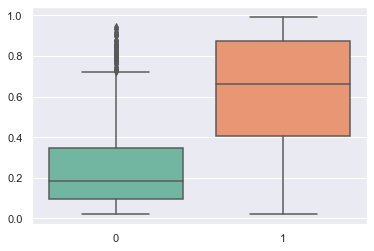

In [136]:
#Boxplot do modelo 1
sns.boxplot(y_val.ravel(), val_probs)

In [138]:
# criando um filtro com threshold .45
val_preds2 = np.where(val_probs2 > 0.45, 1, 0) #  modelo 2

<AxesSubplot:>

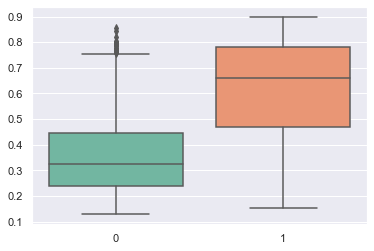

In [139]:
#Boxplot do modelo 2
sns.boxplot(y_val.ravel(), val_probs2)

In [140]:
## Metricas para validação do modelo 1 threshold .45
roc_auc_score(y_val, val_preds)
recall_score(y_val, val_preds)
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

0.7660290740529979

0.7748478701825557

array([[1444,  463],
       [ 111,  382]], dtype=int64)

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1907
           1       0.45      0.77      0.57       493

    accuracy                           0.76      2400
   macro avg       0.69      0.77      0.70      2400
weighted avg       0.83      0.76      0.78      2400



In [141]:
## Metricas para validação do modelo 2 threshold .45
roc_auc_score(y_val, val_preds2)
recall_score(y_val, val_preds2)
confusion_matrix(y_val, val_preds2)
print(classification_report(y_val, val_preds2))

0.7660290740529979

0.7748478701825557

array([[1444,  463],
       [ 111,  382]], dtype=int64)

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1907
           1       0.45      0.77      0.57       493

    accuracy                           0.76      2400
   macro avg       0.69      0.77      0.70      2400
weighted avg       0.83      0.76      0.78      2400



In [118]:
## Salvando o modelo 1
joblib.dump(model, 'churn_model_f1_62.sav')

['churn_model_f1_62.sav']

In [142]:
## Salvando o modelo 2
joblib.dump(model2, 'churn_model_recall_72.sav')

['churn_model_recall_72.sav']

## Carregando os modelos salvos para conferir.

In [149]:
import joblib

In [150]:
## Load model object
model = joblib.load('churn_model_f1_62.sav')

In [234]:
X_test

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.2926405e+05,
        2.0000000e+00, 1.9150140e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1350593e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.3773223e+05,
        2.0000000e+00, 1.3321044e+05],
       ...,
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.0000000e+00, 1.6991502e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 7.2852740e+04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.0000000e+00, 1.7447854e+05]])

In [235]:
## realizando o predict proba e separando apenas as probabilidades de sair 1.
test_probs = model.predict_proba(X_test)[:,1]

In [236]:
test_probs

array([0.35688528, 0.44263724, 0.15350475, ..., 0.08067443, 0.55064717,
       0.27662617])

In [237]:
## Faixa de corte, onde todos os valores acima de .45 será churn(1)
test_preds = np.where(test_probs > 0.45, 1, 0) 

In [238]:
test_preds

array([0, 0, 0, ..., 0, 1, 0])

<AxesSubplot:>

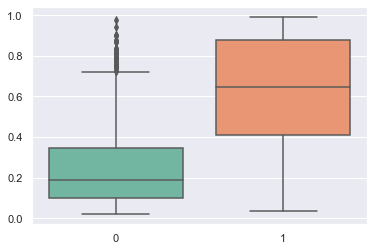

In [239]:
sns.boxplot(y_test.ravel(), test_probs)

In [240]:
## Test set metrics
roc_auc_score(y_test, test_preds)
recall_score(y_test, test_preds)
confusion_matrix(y_test, test_preds)
print(classification_report(y_test, test_preds))

0.7749321366559878

0.7135922330097088

array([[1328,  260],
       [ 118,  294]], dtype=int64)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1588
           1       0.53      0.71      0.61       412

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



In [241]:
## adicionando a predição e as probabilidades no dataset original de teste 
test = df_test.copy()
test['predictions'] = test_preds
test['pred_probabilities'] = test_probs

In [242]:
test.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,predictions,pred_probabilities
CustomerId,,,,,,,,,,,,,,,
15606601,561,0,22,6,186788.960,2,1,0,73286.800,0,1,0,0,0,0.265
15688880,672,1,40,10,102980.440,1,1,0,1285.810,1,0,1,0,1,0.661
15766575,612,0,62,8,140745.330,1,1,0,193437.890,1,0,1,0,1,0.948
15576269,523,1,34,7,0.000,2,1,0,62030.060,0,0,0,1,0,0.083
15778861,720,1,33,6,97188.620,1,0,0,91881.290,0,0,0,1,0,0.189
15777054,584,1,42,3,137479.130,1,1,0,25669.100,0,0,1,0,1,0.708
15585599,530,0,34,8,0.000,2,0,1,141872.520,0,1,0,0,0,0.052
15642468,697,1,42,9,132739.260,2,0,0,174667.650,0,1,0,0,0,0.291
15567506,738,0,40,6,114940.670,2,1,1,194895.570,1,0,1,0,0,0.150


## Criando uma lista dos clientes que probabilidade maior que 70%

In [243]:
churn_high = test[test.pred_probabilities > 0.7].sort_values(by = ['pred_probabilities'], ascending = False
                                                                 ).reset_index().drop(columns = ['Exited', 'predictions'], axis = 1)

In [244]:
# 248 Clientes com alta propensão ao Churn.
churn_high.shape
churn_high.head()

(248, 14)

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,pred_probabilities
0,15806808,834,0,57,8,112281.600,3,1,0,140225.140,0,1,0,0.993
1,15731815,529,1,63,4,96134.110,3,1,0,108732.960,0,0,1,0.991
2,15766355,550,1,49,0,108806.960,3,1,0,61446.920,0,1,0,0.986
3,15788068,743,1,45,10,144677.190,3,1,0,22512.440,0,1,0,0.978
4,15794941,647,0,41,1,85906.650,3,1,0,189159.970,0,1,0,0.977


In [245]:
#Salvando a lista.
churn_high.to_csv('churn_high.csv', index = False)

Feature-based user segments from the above list
Based on business requirements, a prioritization matrix can be defined, wherein certain segments of customers are targeted first. These segments can be defined based on insights through data or the business teams' requirements. E.g. Males who are an ActiveMember, have a CreditCard and are from Germany can be prioritized first because the business potentially sees the max. ROI from them

In [250]:
df.loc[15806808]

CreditScore              834
Geography            Germany
Gender                Female
Age                       57
Tenure                     8
Balance           112281.600
NumOfProducts              3
HasCrCard                  1
IsActiveMember             0
EstimatedSalary   140225.140
Exited                     1
Name: 15806808, dtype: object